CoSim test configuration and runner

In [1]:
import cosim_toolbox.metadataDB as mDB
import runner as myr

_scenario_name = "test_MyTest"
_schema_name = "test_MySchema2"
_federation_name = "test_MyFederation"
r = myr.Runner(_scenario_name, _schema_name, _federation_name, True)
print(r)
r.define_scenario()
mDB.Docker.define_yaml(r.scenario_name)
mDB.Docker.run_remote_yaml(r.scenario_name)



Creating network "test_federation_cu_net" with driver "bridge"
Creating test_federation_helics_1 ... 
Creating test_federation_EVehicle_1 ... 
Creating test_federation_Battery_1  ... 
Creating test_federation_cu_logger_1 ... 
Creating test_federation_helics_1    ... done
Creating test_federation_EVehicle_1  ... done
Creating test_federation_Battery_1   ... done
Creating test_federation_cu_logger_1 ... done
Removing test_federation_cu_logger_1 ... 
Removing test_federation_EVehicle_1  ... 
Removing test_federation_Battery_1   ... 
Removing test_federation_helics_1    ... 
Removing test_federation_EVehicle_1  ... done
Removing test_federation_cu_logger_1 ... done
Removing test_federation_helics_1    ... done
Removing test_federation_Battery_1   ... done
Removing network test_federation_cu_net


/home/worker
{'host': 'gage.pnl.gov', 'dbname': 'copper', 'user': 'postgres', 'password': 'postgres', 'port': '5432'}


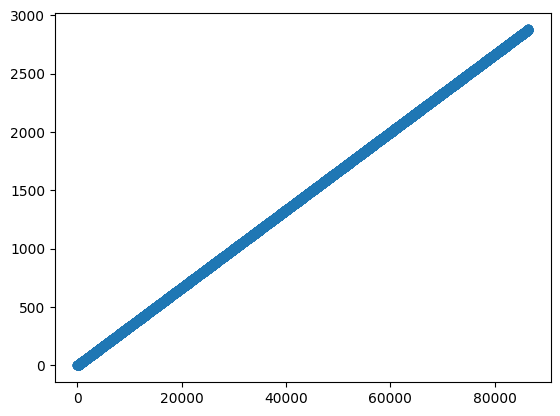

In [5]:
import matplotlib.pyplot as plt
from os import environ
from math import log
import psycopg2

def open_logger():
    connection = {
        "host": environ.get("POSTGRES_HOST", "localhost"),
        "dbname": environ.get("POSTGRES_DB", "copper"),
        "user": environ.get("POSTGRES_USER", "postgres"),
        "password": environ.get("POSTGRES_PASSWORD", "postgres"),
        "port": environ.get("POSTGRES_PORT", 5432)
    }
    print(connection)
    try:
        return psycopg2.connect(**connection)
    except:
        return

_federate_name = "DataLogger"   # TODO: fix the proper federated name
_scenario_name = "test_MyTest"
_schema_name = "test_MySchema2"
_federation_name = "test_MyFederation"

names = ["Battery", "EVehicle"]
items = ["current", "voltage"]
_data_name = names[0] + "/" + items[0]

qry = f"SELECT time, data_value FROM {_schema_name}.HDT_DOUBLE WHERE " \
      f"time > 30 AND " \
      f"scenario = '{_scenario_name}' AND " \
      f"federate = '{_federate_name}' AND " \
      f"data_name = '{names[0]}/{items[0]}';"

conn = open_logger()
cur = conn.cursor()
cur.execute(qry)
records = cur.fetchall()
fig, ax = plt.subplots()
ax.scatter(*zip(*records))

cur.close()

In [ ]:
pip list

In [ ]:
conda list